# Exercise 2

In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Tools
Utility python scripts.

In [2]:
#plot model evaluation metrics
from plotting import *

#pre-processing pipe line functions
from pre_processing import *

#random search regression models
from classifiers import *

#exploration functions
from data_exploration import *

## 1 Dataset
Load data from disk and store as pandas dataframe.

In [3]:
#data sets
DATA_PATH = 'dataset/'
OUTPUT_PATH = 'output/'
FILE_NAME = 'fraud_prep.csv'

data = pd.read_csv(DATA_PATH+FILE_NAME, header=0, index_col=0)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,V29,V30,V31
0,0.0,NaN,-0.072781,NaN,NaN,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,"4820 Sunrise Highway\nSayville, NY 11782\n(40....",NaN,Suffolk
1,0.0,1.191857,0.266151,NaN,NaN,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,"51 20 Northern Boulevard\nWoodside, NY 11377\n","JPMorgan Chase Bank, National Association",Nassau
2,1.0,-1.358354,-1.340163,NaN,NaN,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,"103 Main Street\nCooperstown, NY 13326\n(42.70...",TD Bank N.A.,Erie
3,1.0,-0.966272,-0.185226,NaN,NaN,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,NaN,Santander Bank,Ulster
4,2.0,-1.158233,0.877737,NaN,NaN,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,"2872 Broadway\nNew York, NY 10025\n(40.805224,...",Chemung Canal Trust Company,Oswego


### 1.1 Split Data
Explore training set only, hide test set.

In [5]:
#put target colunmn at last
data = reorder_columns(data, target_column=-4)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

#split to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#create df used for exploration
df = pd.concat((X_train, y_train), axis=1)
df_test = pd.concat((X_test, y_test), axis=1)

In [6]:
X_train.shape, y_train.shape

((199364, 33), (199364,))

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,199364.000000,168266.000000,196222.000000,95311.000000,9945.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,...,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000
mean,94799.493936,0.013857,0.032916,-1.127827,0.001830,-0.001494,-0.000210,-0.000870,-0.001980,0.000212,...,-0.000014,-0.000022,-0.000258,0.000362,0.000395,-0.000094,-0.000027,0.000015,88.667581,0.001731
std,47499.835491,1.816848,1.622130,1.358679,1.414978,1.368744,1.328673,1.226018,1.212338,1.102021,...,0.743450,0.727625,0.629145,0.605298,0.521175,0.481842,0.401042,0.324849,246.104869,0.041563
min,0.000000,-40.042537,-63.344698,-33.680984,-4.786898,-42.147898,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,54126.000000,-0.853675,-0.562767,-1.685398,-0.846155,-0.692874,-0.769177,-0.554220,-0.209086,-0.644753,...,-0.229272,-0.544345,-0.162021,-0.354179,-0.316088,-0.327327,-0.070864,-0.052907,5.650000,0.000000
50%,84633.500000,-0.031317,0.081309,-0.954211,0.000186,-0.055832,-0.274397,0.039228,0.021803,-0.049633,...,-0.029045,0.006744,-0.010915,0.040974,0.018014,-0.052287,0.001064,0.011119,22.000000,0.000000
75%,139334.250000,1.261505,0.815190,-0.364442,0.747243,0.609349,0.397928,0.569638,0.327023,0.597096,...,0.187095,0.531017,0.147503,0.438953,0.350802,0.241082,0.090491,0.077989,77.580000,0.000000
max,172792.000000,2.451888,22.057729,3.790692,11.125435,34.099309,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.463246,12.152401,22.620072,19656.530000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 161145 to 117952
Data columns (total 34 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V29     197760 non-null  object 
 1   V30     192027 non-null  object 
 2   V31     196966 non-null  object 
 3   Time    199364 non-null  float64
 4   V1      168266 non-null  float64
 5   V2      196222 non-null  float64
 6   V3      95311 non-null   float64
 7   V4      9945 non-null    float64
 8   V5      199364 non-null  float64
 9   V6      199364 non-null  float64
 10  V7      199364 non-null  float64
 11  V8      199364 non-null  float64
 12  V9      199364 non-null  float64
 13  V10     199364 non-null  float64
 14  V11     199364 non-null  float64
 15  V12     199364 non-null  float64
 16  V13     199364 non-null  float64
 17  V14     199364 non-null  float64
 18  V15     199364 non-null  float64
 19  V16     199364 non-null  float64
 20  V17     199364 non-null  float64
 21  V18  

In [9]:
df['Class'].value_counts()

0    199019
1       345
Name: Class, dtype: int64

## 2 Data Exploration
Dive into data to prepare for feature selection and model selection.

### 2.1 Correlation Matrix
Show the headmap of all features.

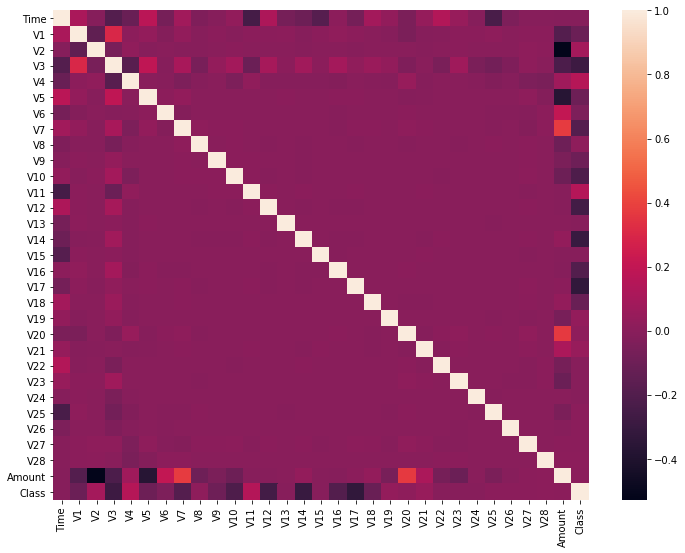

In [10]:
show_correlation(df)

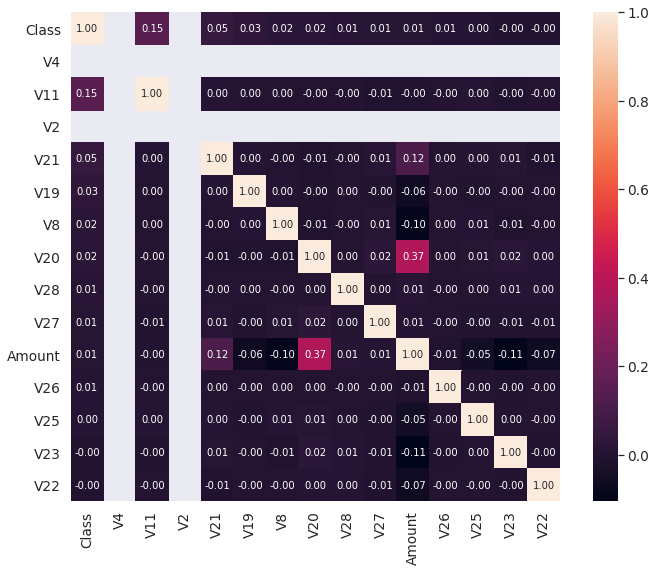

In [11]:
cols = show_top_related(df, 'Class', k=15)

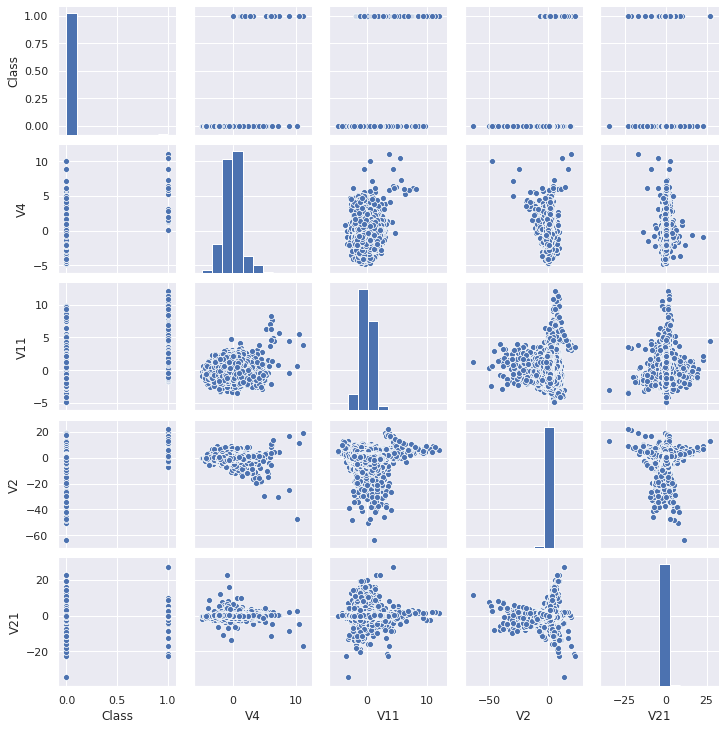

In [12]:
show_pair_plot(df[cols[:5]])

### 2.2 Bivariate Analysis

#### 2.2.1 Category

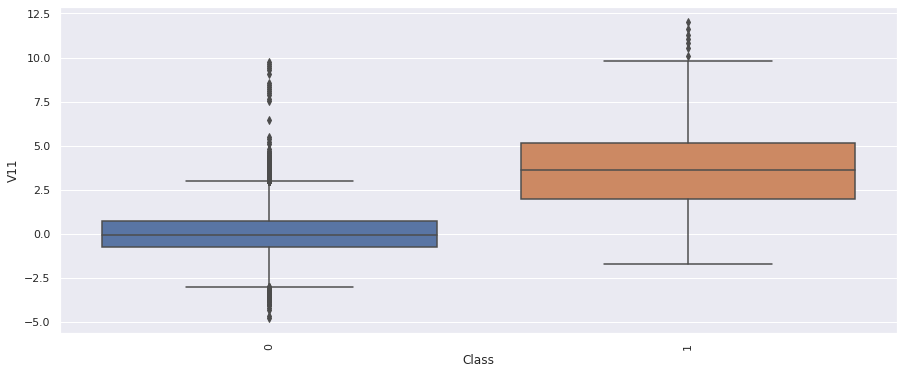

In [13]:
show_cat_relation(df, 'Class', 'V11')

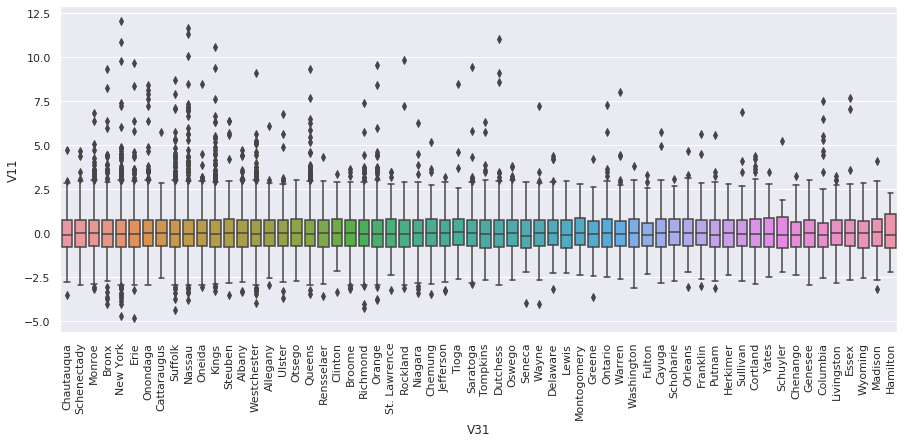

In [14]:
show_cat_relation(df, 'V31', 'V11')

#### 2.2.2 Numerical

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


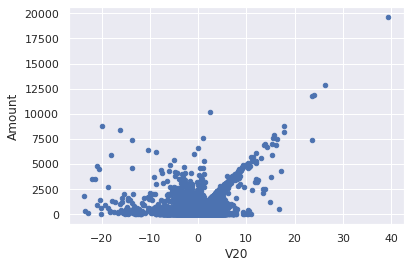

In [15]:
show_num_relation(df, 'V20', 'Amount')

### 2.3 Normalization
Convert original distribution to normal(gaussion) distribution.

#### Before

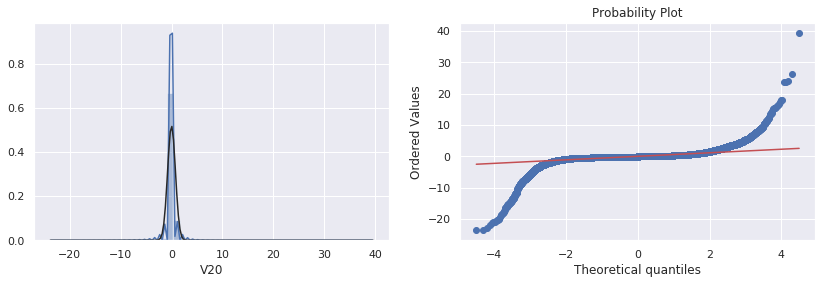

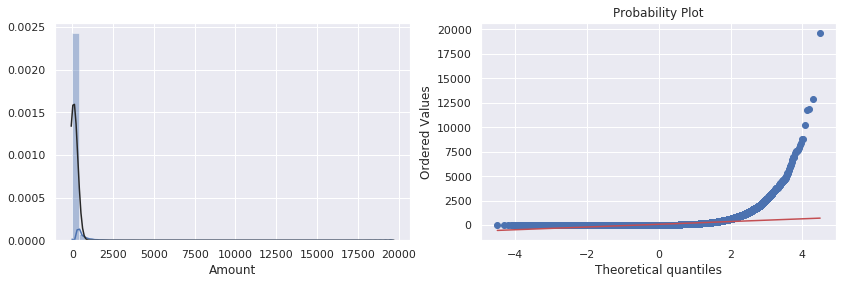

In [16]:
f1 = 'V20'
f2 = 'Amount'
show_distribution(df, f1)
show_distribution(df, f2)

#### After

Normalized to gaussion distribution


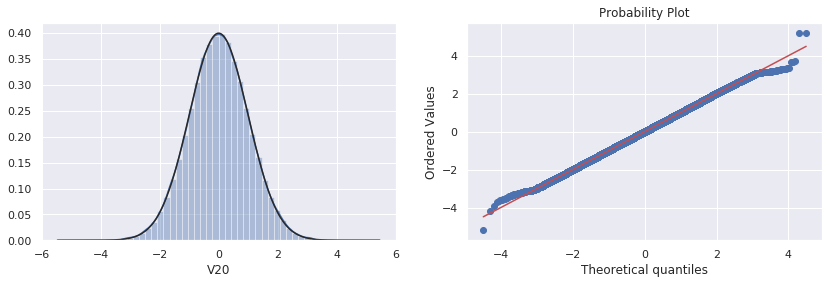

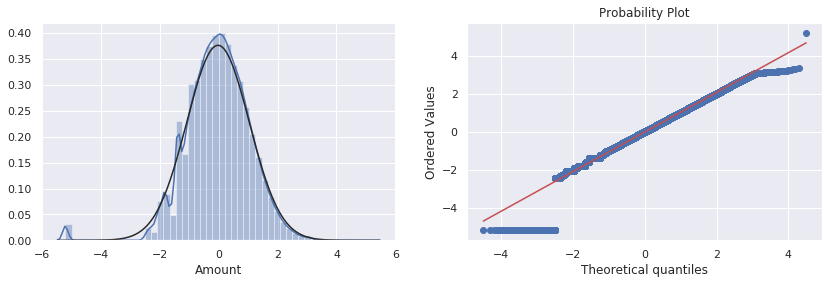

In [17]:
gau, _ = gaussion_normarlize(df[[f1,f2]], df[[f1,f2]])
show_distribution(gau, f1)
show_distribution(gau, f2)

#### Homoscedasticity
Compare distribution with 2.2.2, the homoscedasticity violation is now fixed.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


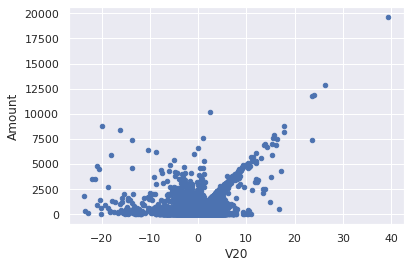

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


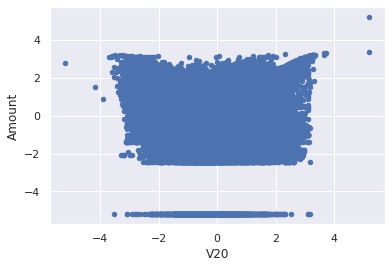

In [18]:
show_num_relation(df, f1, f2)
show_num_relation(gau, f1, f2)

### 2.4 Missing Data

In [19]:
missing_data = get_missing_data(df)
missing_data.head(10)

,Missing,%
V4,189419,0.950116
V3,104053,0.521925
V1,31098,0.155986
V30,7337,0.036802
V2,3142,0.015760
V31,2398,0.012028
V29,1604,0.008046
Time,0,0.000000
Amount,0,0.000000
V5,0,0.000000


## 3 Preprocessing
Experiments of feature selection and feature engineering methods.

In [20]:
"""
Pipeline class takes pre-processing functions and their parameters,
process the data before making predictions, store processed data and best models afterwards.
See pre_processing.py, regressors.py and plotting.py for more details.
"""
class Pipeline:
    #take a dictionary with function as key and functions' parameters as value
    def __init__(self, transformers):
        self.transformers = transformers
        self.estimators = None
        self.estimators_times = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
    
    #preprocess dataset with given functions and store in the model
    #see pre_processing.py
    def fit(self, x_train, y_train, x_test, y_test):
        x_train, x_test = x_train, x_test
        for trans in self.transformers:
            param = self.transformers[trans]
            if param == None:
                x_train, x_test = trans(x_train, x_test)
            elif type(param) is list and len(param)==2:
                x_train, x_test = trans(x_train, x_test, param[0], param[1])
            else:
                x_train, x_test = trans(x_train, x_test, param)
        self.X_train = x_train
        self.X_test = x_test
        self.y_train = y_train
        self.y_test = y_test
    
    #make prediction and evaluate with defualt metrics.
    #see regressors.py and plotting.py
    def predict(self, estimator='all'):
        assert self.X_train is not None
        if estimator == 'all':
            all_clfs, clf_names, clf_times = run_all_clfs(self.X_train, self.y_train, self.X_test, self.y_test)
            roc, pr = evaluate_classifiers(self.X_test, self.y_test, all_clfs, clf_names, FILE_NAME, OUTPUT_PATH)
        elif estimator == 'lr':
            all_clfs, clf_names, clf_times = run_lr_clf(self.X_train, self.y_train, self.X_test, self.y_test)
            roc, pr = evaluate_classifiers(self.X_test, self.y_test, all_clfs, clf_names, FILE_NAME, OUTPUT_PATH)            
        self.estimators = all_clfs
        self.estimators_times = clf_times


In [21]:
# #plot non-normalized confusion matrix(default)
# def plot_confusion_matrix(estimator, X_test, y_test, classes, cmap=plt.cm.Blues, title='Confusion Matrix', threshold=None, normalize=None):
#     import itertools
#     from sklearn.metrics import confusion_matrix
#     from mpl_toolkits.axes_grid1 import make_axes_locatable

#     if threshold == None:
#         y_pred = estimator.predict(X_test)
#     else:
#         y_proba = estimator.predict_proba(X_test)
#         y_pred = y_proba[:,1] > threshold
    
#     cm = confusion_matrix(y_test, y_pred)
    
#     np.set_printoptions(precision=2)
#     recall = cm[1,1]/(cm[1,0]+cm[1,1])
        
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=0)
#     plt.yticks(tick_marks, classes, rotation=90)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
#     plt.title(title+' (Recall: %.2f%%)'%(recall*100))
#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     ax = plt.gca()
#     im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)    
#     plt.colorbar(im, cax=cax)

# #plot confusion matrix with given thresholds    
# def plot_cm_thresholds(estimator, X_test, y_test, classes, thresholds):
#     plt.figure(figsize=(20,15))
#     for j,i in enumerate(thresholds):
#         plt.subplot(3,4,j+1)
#         plot_confusion_matrix(estimator, X_test, y_test, classes, title='Threshold >= %s'%i, threshold=i) 

### 3.1 Sampling

#### No Sampling
Build a model with basic necessary preprocessing to make it work. Training is faster than SMOTE and get better result, but may not genarlize well (test set still imblanced!).

Encoding X features...
Imputed missing data with "mean"
Standardized data with StandardScaler
Training LogisticRegression ...


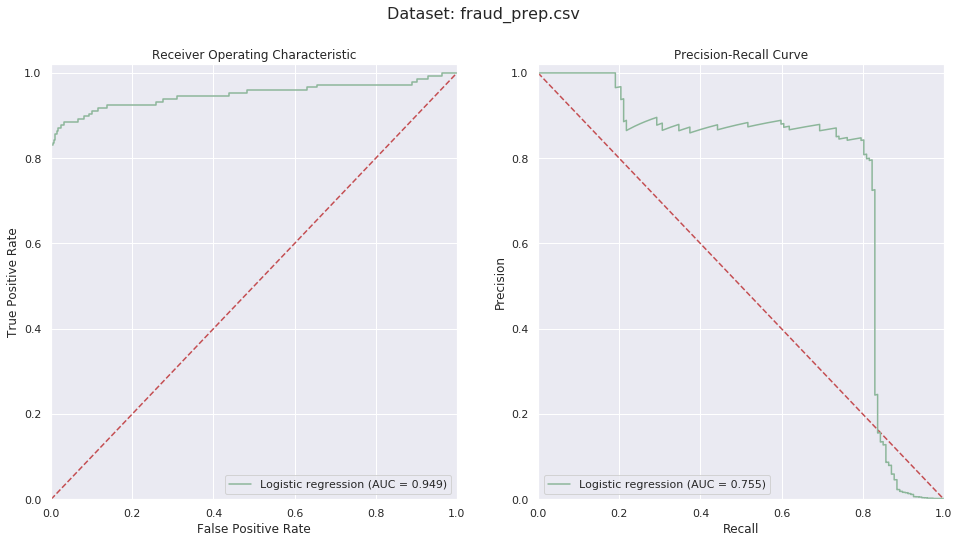

Training Set: X_train (199364, 33), y_train (199364,)
Test Set: X_test (85443, 33), y_test (85443,)
CPU times: user 6.62 s, sys: 1.16 s, total: 7.78 s
Wall time: 28.8 s


In [22]:
%%time
model = Pipeline({encode_labels:preprocessing.LabelEncoder(),
                  impute_value:'mean',
                  standardize_data:preprocessing.StandardScaler(),
                 })
model.fit(X_train, y_train, X_test, y_test)
model.predict(estimator='lr')
lr1 = model.estimators[0]
print('Training Set: X_train %s, y_train %s'%(model.X_train.shape,model.y_train.shape))
print('Test Set: X_test %s, y_test %s'%(model.X_test.shape,model.y_test.shape))

#### UnderSampling
Sample non-fraud rows and keep all fraud rows, make it even.

In [23]:
def undersample(df, n=None):
    fraud_indexs = df[df.Class == 1].index
    normal_indexs = df[df.Class == 0].index
    if n == None:
        num_of_sample = len(fraud_indexs)
    else:
        num_of_sample = n
    #sample normal from all normal
    sample_indexs = np.random.choice(normal_indexs, num_of_sample, replace = False)
    total_indexs = np.concatenate([fraud_indexs,sample_indexs])
    sample_df = data.iloc[total_indexs,:]
    print('Sample %s records from %s rows.'%(num_of_sample,len(normal_indexs)))    
    return sample_df

In [24]:
sample_df = undersample(df)
X_sample = sample_df.loc[:, sample_df.columns != 'Class']
y_sample = sample_df.loc[:, sample_df.columns == 'Class']

Sample 345 records from 199019 rows.


In [25]:
y_sample.Class.value_counts()

1    345
0    345
Name: Class, dtype: int64

Encoding X features...
Imputed missing data with "mean"
Standardized data with StandardScaler
Training LogisticRegression ...


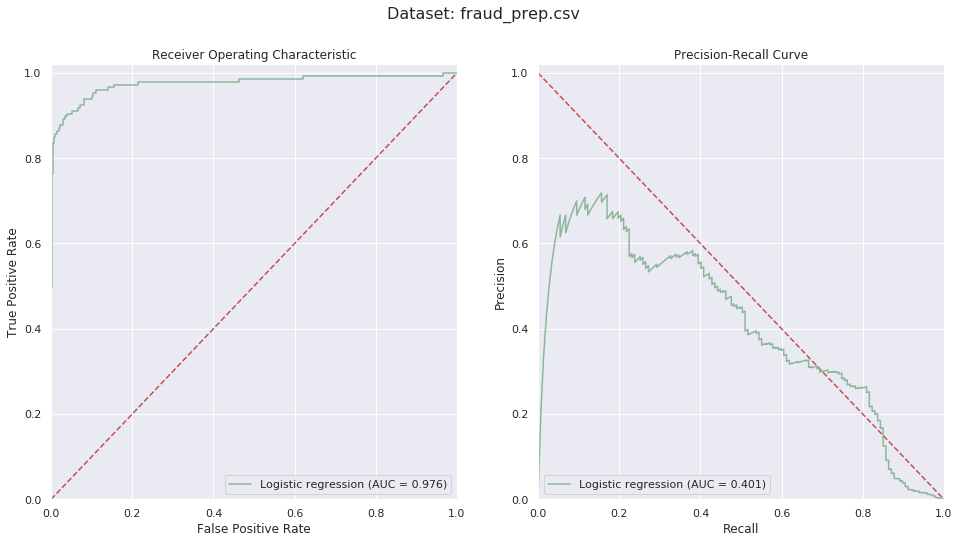

Training Set: X_train (690, 33), y_train (690, 1)
Test Set: X_test (85443, 33), y_test (85443,)
CPU times: user 2.78 s, sys: 156 ms, total: 2.94 s
Wall time: 1.33 s


In [26]:
%%time
model.fit(X_sample, y_sample, X_test, y_test)
model.predict(estimator='lr')
lr2 = model.estimators[0]

print('Training Set: X_train %s, y_train %s'%(model.X_train.shape,model.y_train.shape))
print('Test Set: X_test %s, y_test %s'%(model.X_test.shape,model.y_test.shape))

#### Oversampling(SMOTE)

SMOTE oversampling is slow because of data augmentation(?) but performs much better in PR graph, this metric is important for imblanced dataset, we will see more details latter.

In [27]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2, n_jobs=-1)

model.fit(X_train, y_train, X_test, y_test)
X_smote, y_smote = sm.fit_sample(model.X_train, model.y_train)

Encoding X features...
Imputed missing data with "mean"
Standardized data with StandardScaler


In [28]:
print('Before SMOTE: \n', y_train.value_counts())
print('After SMOTE: \n', y_smote.value_counts())

Before SMOTE: 
 0    199019
1       345
Name: Class, dtype: int64
After SMOTE: 
 1    199019
0    199019
Name: Class, dtype: int64


Encoding X features...
Imputed missing data with "mean"
Standardized data with StandardScaler
Training LogisticRegression ...


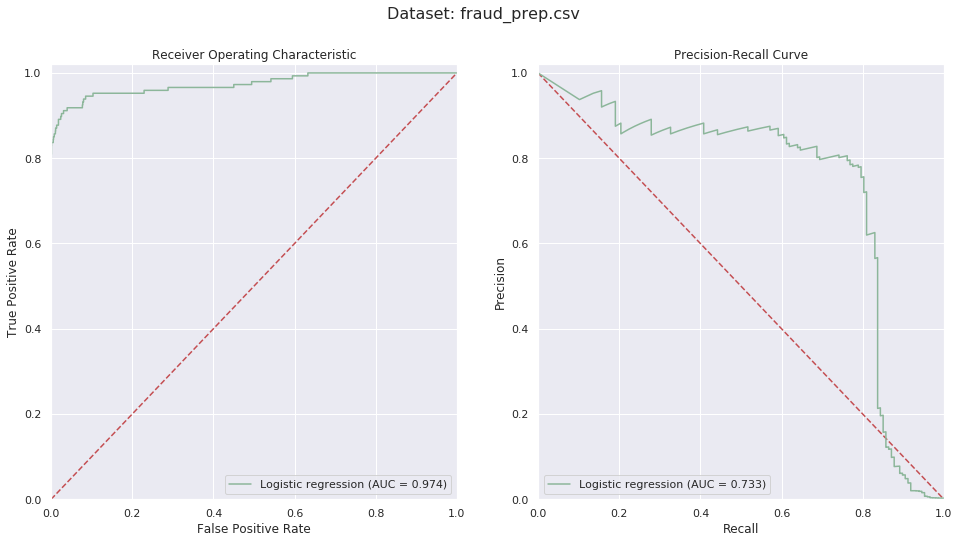

Training Set: X_train (398038, 33), y_train (398038,)
Test Set: X_test (85443, 33), y_test (85443,)
CPU times: user 11.3 s, sys: 392 ms, total: 11.7 s
Wall time: 1min 11s


In [29]:
%%time
model.fit(X_smote, y_smote, model.X_test, model.y_test)
model.predict(estimator='lr')
lr3 = model.estimators[0]
print('Training Set: X_train %s, y_train %s'%(model.X_train.shape,model.y_train.shape))
print('Test Set: X_test %s, y_test %s'%(model.X_test.shape,model.y_test.shape))

### 3.2 Feature Selection

#### 3.2.1 All Features
Make prediction using Logistic Regression with all rows and all columns(use the same model before). see 3.1 figure1.

#### 3.2.2 Drop Features
Drop columns(features) with more than 50% missing data, impute with 'mean' strategy, predicted on sample dataset with all estimators.

Old model without dropping features

Encoding X features...
Imputed missing data with "mean"
Standardized data with StandardScaler
Training KNN ...
Training SVM ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training LogisticRegression ...
Training GaussianNaiveBayes ...
Training NeuralNetwork ...


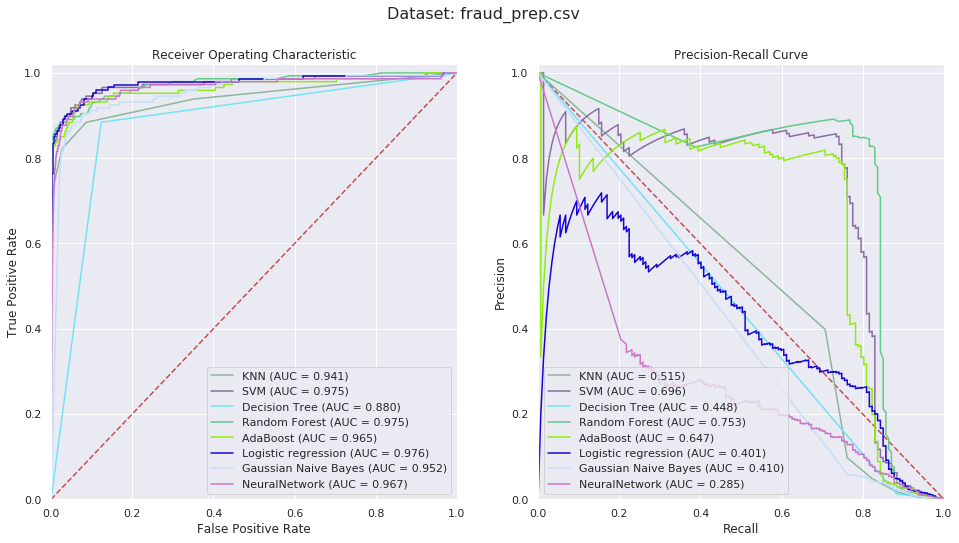

In [30]:
model.fit(X_sample, y_sample, X_test, y_test)
model.predict(estimator='all')

New model build with undersample dataset for speed up.

Encoding X features...
Dropped 1 features
Imputed missing data with "mean"
Standardized data with StandardScaler
Training KNN ...
Training SVM ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training LogisticRegression ...
Training GaussianNaiveBayes ...
Training NeuralNetwork ...


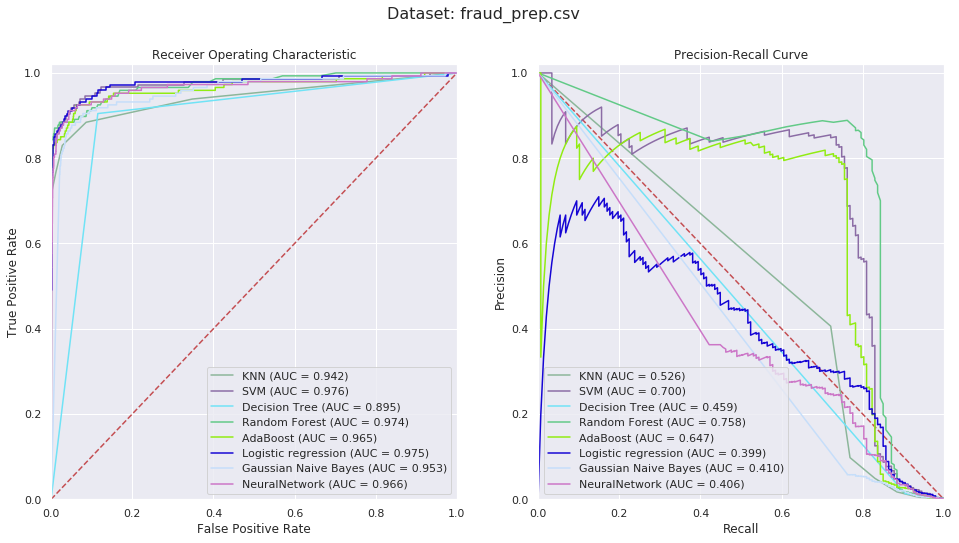

CPU times: user 23.4 s, sys: 504 ms, total: 23.9 s
Wall time: 23.4 s


In [31]:
%%time
model2 = Pipeline({encode_labels:preprocessing.LabelEncoder(),
                   drop_features:0.5,
                   impute_value:'mean',
                   standardize_data:preprocessing.StandardScaler(),
                 })
model2.fit(X_sample, y_sample, X_test, y_test)
model2.predict(estimator='all')

#### 3.2.3 Hand Selected Feature
Select features based on above data exploration (k=15), drop columns with more than 50% missing data(same model as above).

Encoding X features...
Dropped 1 features
Imputed missing data with "mean"
Standardized data with StandardScaler
Training KNN ...
Training SVM ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training LogisticRegression ...
Training GaussianNaiveBayes ...
Training NeuralNetwork ...


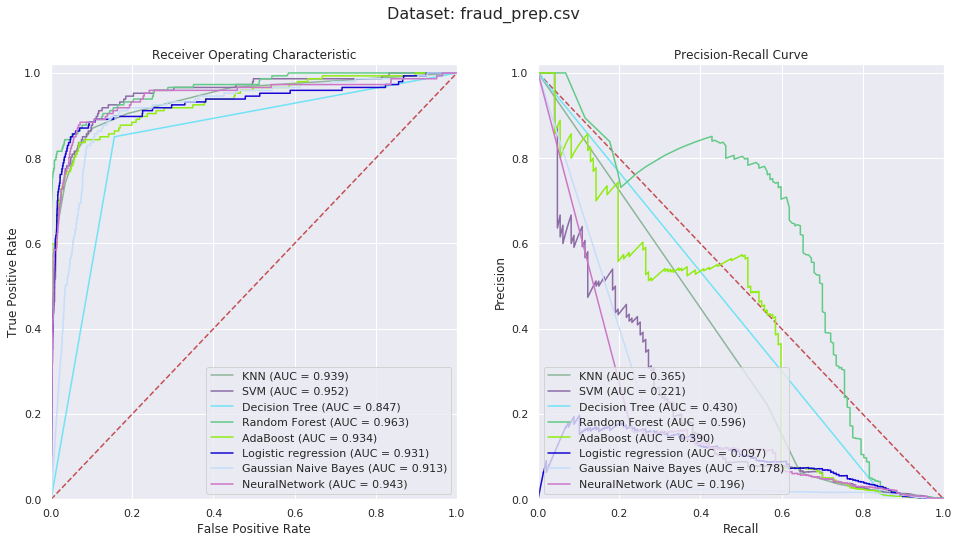

In [32]:
model2.fit(X_sample[cols[1:]], y_sample, X_test[cols[1:]], y_test)
model2.predict(estimator='all')

### 3.3 Dimension Reduction
Dimension reduction with PCA(15-D) and t-SNE, drop columns with more than 80% missing data, impute with 'mean' strategy. Better PR curves.

#### 3.3.1 PCA

Encoding X features...
Dropped 1 features
Imputed missing data with "mean"
Standardized data with MinMaxScaler
Reduce dimension form 32 to 15
Training KNN ...
Training SVM ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training LogisticRegression ...
Training GaussianNaiveBayes ...
Training NeuralNetwork ...


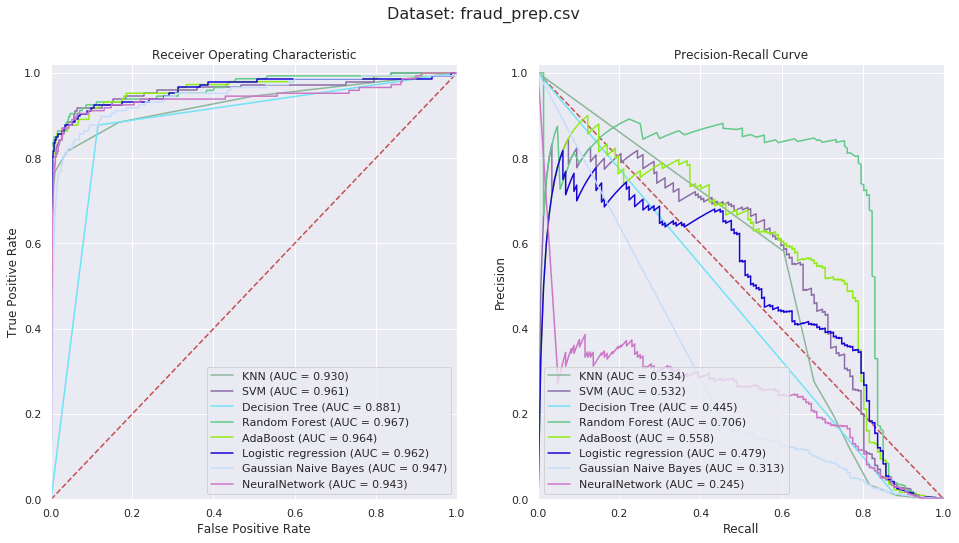

CPU times: user 31.6 s, sys: 692 ms, total: 32.3 s
Wall time: 22.6 s


In [33]:
%%time
model3 = Pipeline({encode_labels:preprocessing.LabelEncoder(),
                   drop_features:0.8,
                   impute_value:'mean',
                   standardize_data:preprocessing.MinMaxScaler(),
                   dimension_reduction:15,
                 })
model3.fit(X_sample, y_sample, X_test, y_test)
model3.predict()

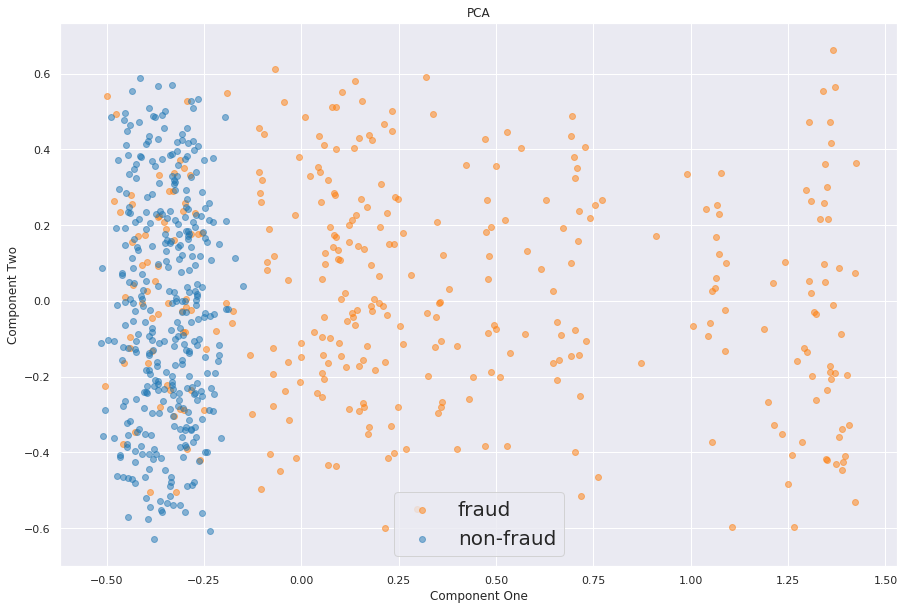

In [34]:
class_names = ['non-fraud','fraud']
plot_embedding(model3.X_train, model3.y_train, class_names, 'PCA')

#### 3.3.2 t-SNE

In [35]:
from sklearn.manifold import TSNE

model.fit(X_sample, y_sample, X_test, y_test)
X_embedded = TSNE(n_components=2).fit_transform(model.X_train)

Encoding X features...
Imputed missing data with "mean"
Standardized data with StandardScaler


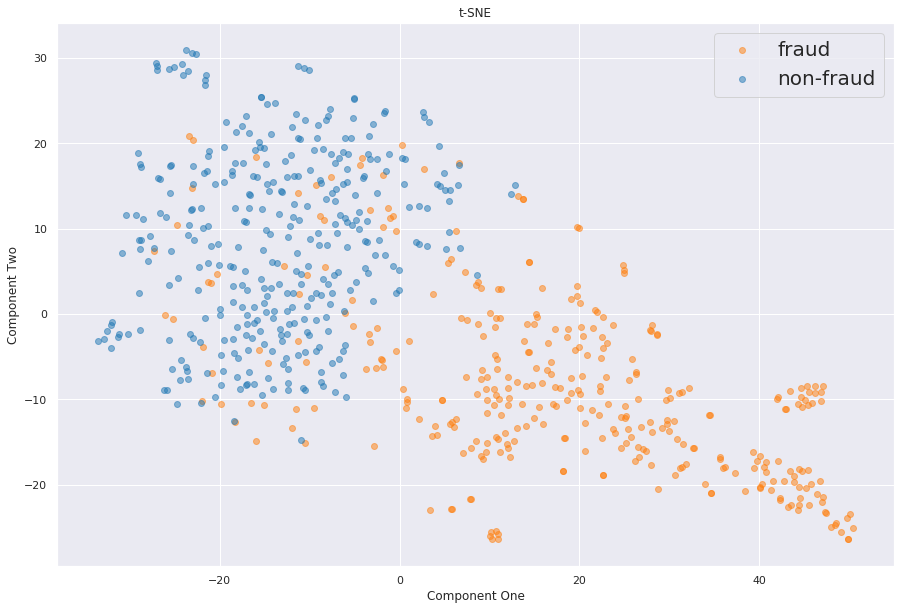

In [36]:
plot_embedding(X_embedded, model3.y_train, class_names, 't-SNE')

#### 3.3.3 Dimension/Score Curves
Plot default classifier score(accuracy) w.r.t feature dimensions(from 0 to all features).

In [37]:
#pass fewer estimators to speed up, e.g. model3.estimators[5:6]
# plot_dimension_score_curve(model3.X_train, model3.y_train, model3.X_test, model3.y_test, model3.estimators[:], OUTPUT_PATH)

<img src="output/dimension_curves.png">

### 3.4 Feature Engineering

#### 3.4.1 Encoders
Train a same model as previous 15-d model(model3) with different encoders.

In [38]:
import category_encoders as ce

#### 3.4.2 Scaler
Similar with model3 but using StandardScaler.OUTPUT_PATH

Encoding X features...
Dropped 1 features
Imputed missing data with "mean"
Standardized data with StandardScaler
Reduce dimension form 32 to 15
Training KNN ...
Training SVM ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training LogisticRegression ...
Training GaussianNaiveBayes ...
Training NeuralNetwork ...


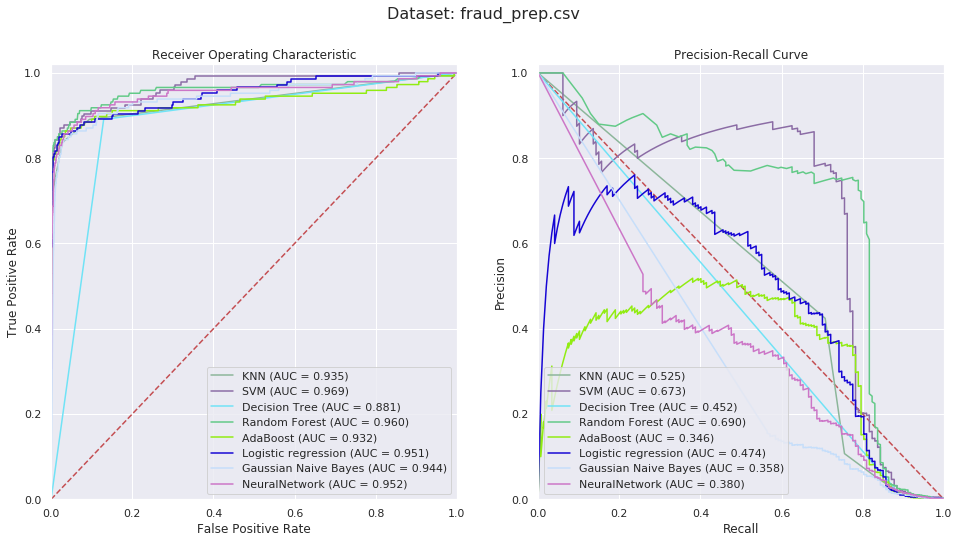

CPU times: user 25.8 s, sys: 532 ms, total: 26.3 s
Wall time: 19.7 s


In [39]:
%%time
model4 = Pipeline({encode_labels:preprocessing.LabelEncoder(),
#                    encode_labels:ce.CountEncoder(),
                   drop_features:0.8,
                   impute_value:'mean',
                   standardize_data:preprocessing.StandardScaler(),
                   dimension_reduction:15,
                 })
model4.fit(X_sample, y_sample, X_test, y_test)
model4.predict()

#### 3.4.3 Gaussion Distribution
Train same model as model4 with gaussion normalization.

Encoding X features...
Dropped 1 features
Imputed missing data with "mean"
Standardized data with StandardScaler
Reduce dimension form 32 to 15
Normalized to gaussion distribution
Training KNN ...
Training SVM ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training LogisticRegression ...
Training GaussianNaiveBayes ...
Training NeuralNetwork ...


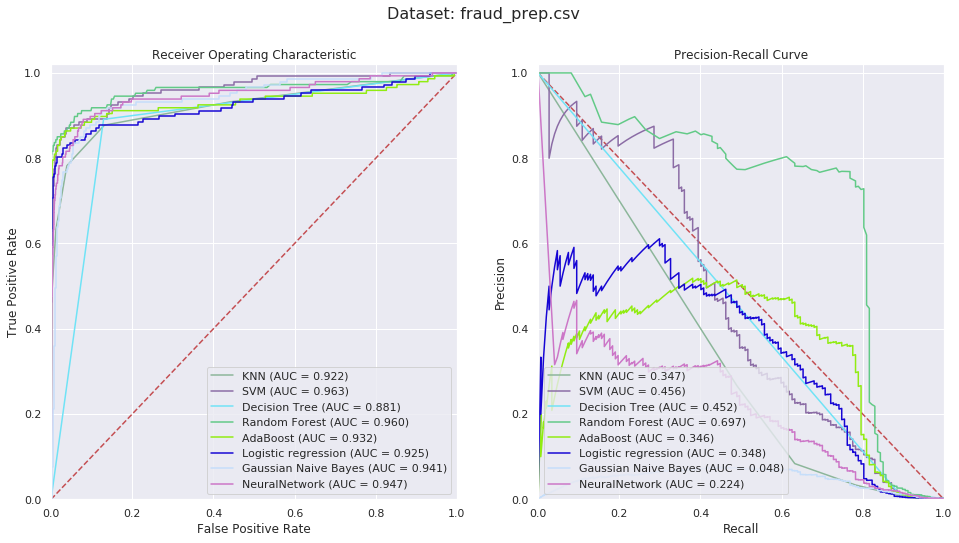

CPU times: user 22.6 s, sys: 476 ms, total: 23.1 s
Wall time: 18.7 s


In [40]:
%%time
model5 = Pipeline({encode_labels:preprocessing.LabelEncoder(),
#                    encode_labels:ce.CountEncoder(),
                   drop_features:0.8,
                   impute_value:'mean',
                   standardize_data:preprocessing.StandardScaler(),
                   dimension_reduction:15,
                   gaussion_normarlize:None,
                 })
model5.fit(X_sample, y_sample, X_test, y_test)
model5.predict()

#### 3.4.4 Others
Combine different encoders, impputers, scalers and dimensions to do hyperparameter search.
* Encoder: [ LabelEncoder(), ce.CountEncoder(), ce.TargetEncoder() ]
* Imputer: [ 'most_frequent', 'mean', 'meadian' ]
* Scaler: [ StandardScaler(), MinMaxScaler() ]

## 4 Model Comparison

### 4.1 Prediction Evaluation
For very imblanced dataset like this, the metric that used to evaluate models is very important. Accuracy and ROC is not suitable since the model could trick the evaluation by simply assign all data to the majority class and get high scores. PR curve and confusion matrix is very useful in this situation.

#### 4.1.1 ROC/PR
See 3.2 figures.

#### 4.1.2 Accuracy
See 3.3.3 figures.

#### 4.1.3 Confusion Matrix
Undersample and oversample achieve similar high recall rate, no sample cause serious problem as said before (0 recall).

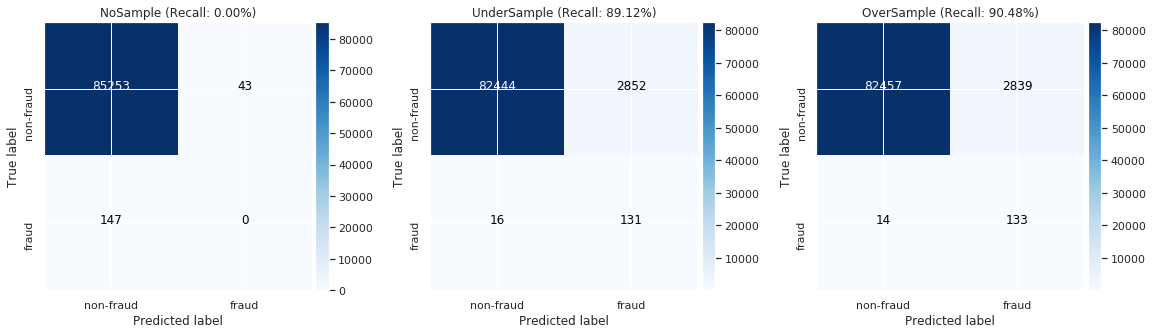

In [41]:
class_names = ['non-fraud','fraud']
plt.figure(figsize=(16,5))
plt.subplot(131)
plot_confusion_matrix(lr1, model.X_test, model.y_test, classes=class_names, cmap=plt.cm.Blues, normalize=None, title='NoSample')
plt.subplot(132)
plot_confusion_matrix(lr2, model.X_test, model.y_test, classes=class_names, cmap=plt.cm.Blues, normalize=None, title='UnderSample')
plt.subplot(133)
plot_confusion_matrix(lr3, model.X_test, model.y_test, classes=class_names, cmap=plt.cm.Blues, normalize=None, title='OverSample')

We can change confusion matrix threshold to increase recall rate.

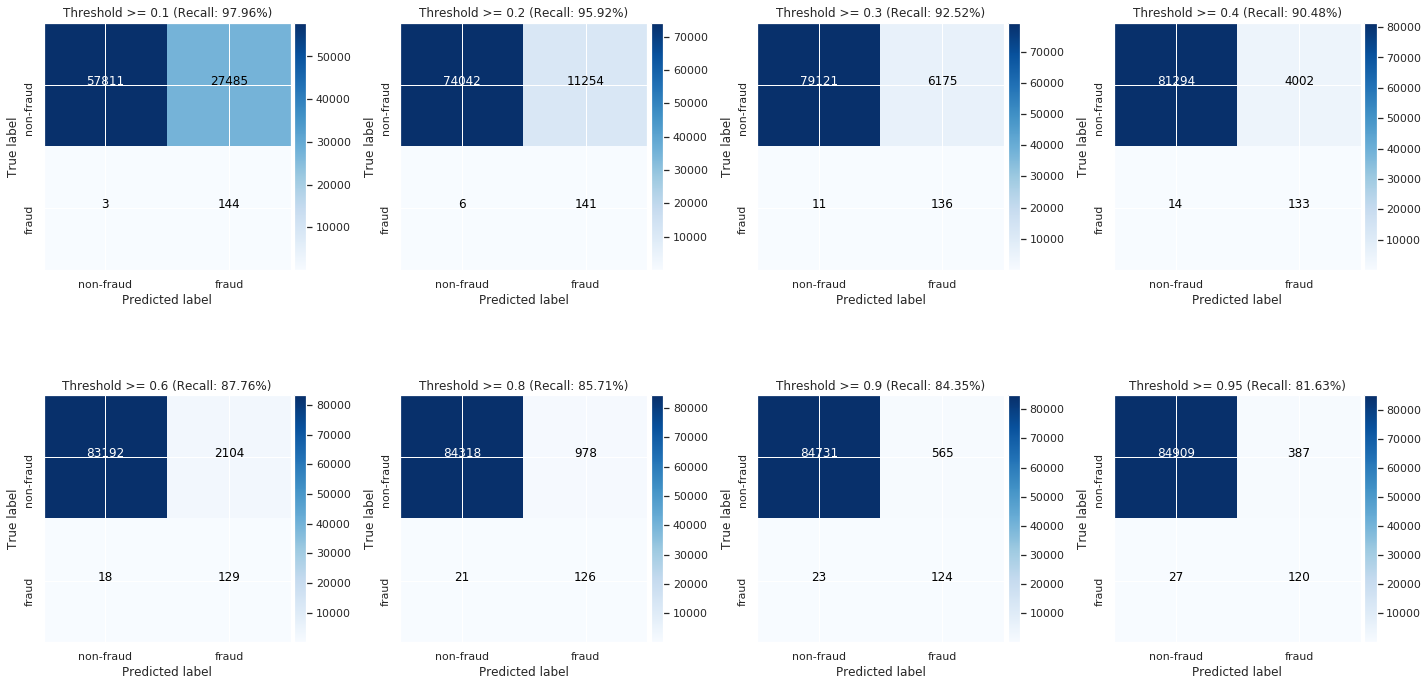

In [42]:
thresholds = [0.1,0.2,0.3,0.4,0.6,0.8,0.9,0.95]
plot_cm_thresholds(lr2, model.X_test, model.y_test, classes=class_names, thresholds=thresholds)

Estimators from model3 (3.3.1).

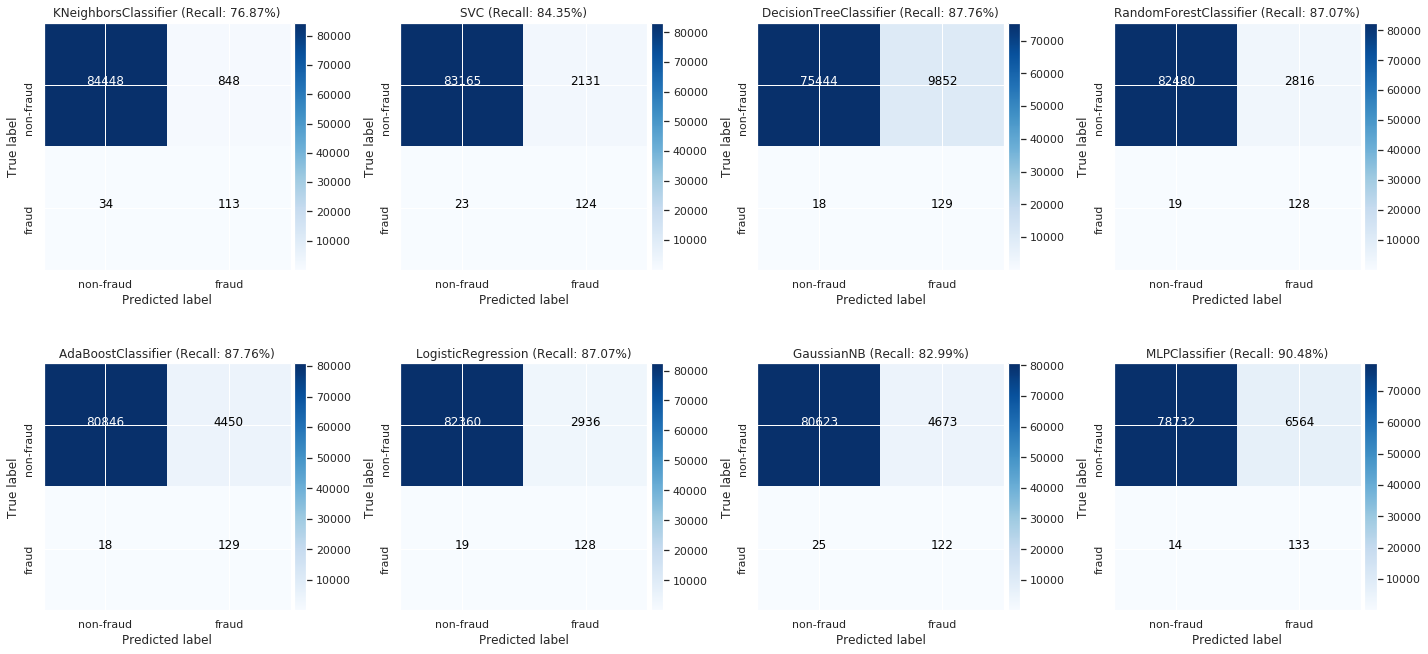

In [43]:
plt.figure(figsize=(20,10))
for i,e in enumerate(model3.estimators):
    plt.subplot(2,4,i+1)
    name = str(e).split('(')[0]
    plot_confusion_matrix(e, model3.X_test, model3.y_test, classes=class_names, cmap=plt.cm.Blues, normalize=None, title=name)

### 4.2 Training Time

In [44]:
def show_estimator_time(estimators, estimator_times):
    estimators_names = [str(e).split('(')[0] for e in estimators]
    N = len(estimators)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5       # the width of the bars: can also be len(x) sequence
    plt.figure(figsize=(8,6))
    plt.barh(ind, estimator_times, align='center', height=width)
    for i, v in enumerate(estimator_times):
        plt.text(v,ind[i]+0.1,'%.2f'%v)
    plt.title('Estimator Training Time')
    plt.yticks(ind, estimators_names)
    plt.xlabel('Time (s)')
    plt.gca().invert_yaxis()
    plt.show()

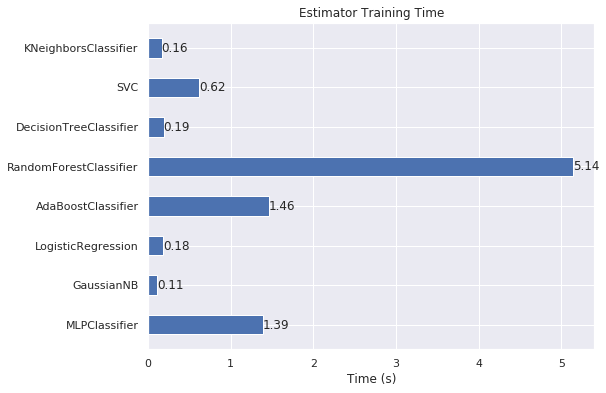

In [45]:
show_estimator_time(model.estimators, model.estimators_times)

### 4.3 Memory Consumption

In [46]:
def show_memory_consumption(estimators):
    import pickle
    import sys    
    names = [str(e).split('(')[0] for e in estimators]
    memories = []
    for e in estimators:
        p = pickle.dumps(e)
        memories.append(sys.getsizeof(p)*1.0/1e+6)
        
    N = len(estimators)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5      # the width of the bars: can also be len(x) sequence
    plt.figure(figsize=(8,6))
    plt.barh(ind, memories, align='center', height=width)
    for i, v in enumerate(memories):
        plt.text(v,ind[i]+0.1,'%.3f'%v)
    plt.title('Estimator Memory Consumption')
    plt.yticks(ind, names)
    plt.xlabel('Memory (MB)')
    plt.gca().invert_yaxis()
    plt.show()        

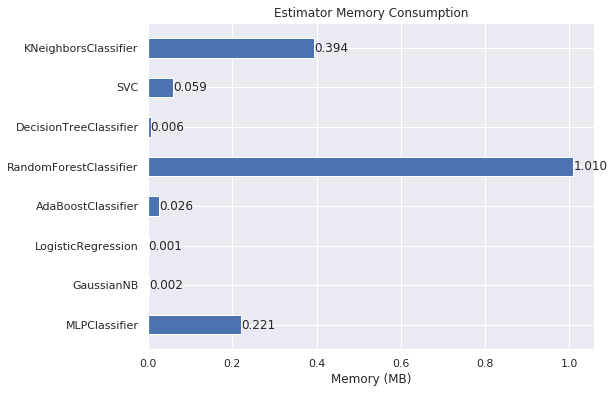

In [47]:
show_memory_consumption(model.estimators)

### 4.4 Conclusion (Occam's razor)
- KNN, SVC, RandomFroest, LogisticRegression have high area under PR curve(AUC).
- SVC, RandomFroest, LogisticRegression have high recall in confusion matrix.
- KNN, NeuralNetwork, RandomFroest are expensive to train.

So, SVC and LogisticRegression is best for this task.

## 5 Model Explainability
Interpret trained model to solve 'black-box' problem, understand the logic behind predictions.

In [48]:
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, get_dataset, info_plots
import shap

In [49]:
df_train_sample = undersample(df)
df_test_sample = undersample(df_test)

X_train_sample = df_train_sample.loc[:, df_train_sample.columns != 'Class']
y_train_sample = df_train_sample.loc[:, df_train_sample.columns == 'Class']
X_test_sample = df_test_sample.loc[:, df_test_sample.columns != 'Class']
y_test_sample = df_test_sample.loc[:, df_test_sample.columns == 'Class']

Sample 345 records from 199019 rows.
Sample 147 records from 85296 rows.


In [50]:
X_train_sample.shape, X_test_sample.shape

((690, 33), (294, 33))

Encoding X features...
Imputed missing data with "mean"
Standardized data with StandardScaler
Training KNN ...
Training SVM ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training LogisticRegression ...
Training GaussianNaiveBayes ...
Training NeuralNetwork ...


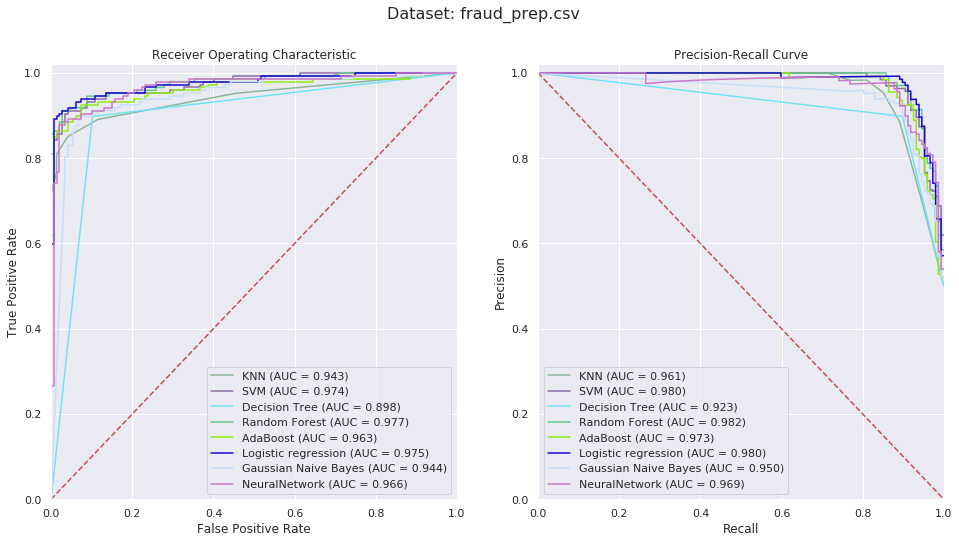

In [51]:
#all the best regression estimators
model.fit(X_train_sample, y_train_sample, X_test_sample, y_test_sample)
model.predict()

In [52]:
svc = model.estimators[1]
lr = model.estimators[5]
forest = model.estimators[3]
nn = model.estimators[-1]

In [53]:
estimator = lr

### 5.1 Feature Importance
Use permutation importance to calculate feature importance. Randomly re-order a single important column should cause less accurate predictions.


In [54]:
def show_permutation_importance(estimator, data, target):
    perm = PermutationImportance(estimator, random_state=0).fit(data, target)
    return eli5.show_weights(perm, feature_names = data.columns.tolist())

In [55]:
show_permutation_importance(estimator, model.X_test, model.y_test)

Weight,Feature
0.2102 ± 0.0208,V14
0.1299 ± 0.0393,V12
0.0973 ± 0.0267,V7
0.0422 ± 0.0246,V2
0.0367 ± 0.0169,V5
0.0361 ± 0.0318,Amount
0.0163 ± 0.0090,V6
0.0136 ± 0.0255,V11
0.0122 ± 0.0082,V20
0.0116 ± 0.0092,V3


### 5.2 Partial Dependence
While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions.

In [56]:
def show_pdp(estimator, data, feature):
    pdp_target = pdp.pdp_isolate(model=estimator, dataset=data, model_features=data.columns.tolist(), feature=feature)
    pdp.pdp_plot(pdp_target, feature)
    plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


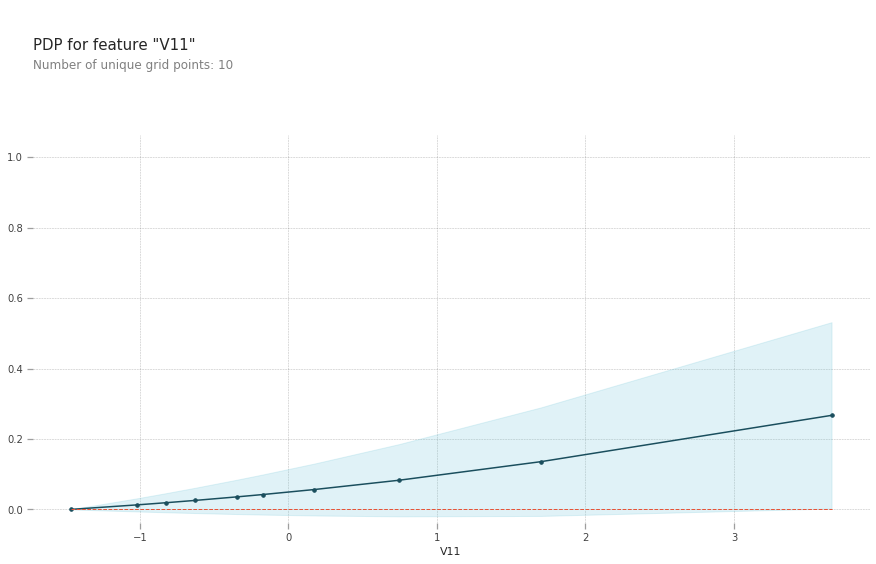

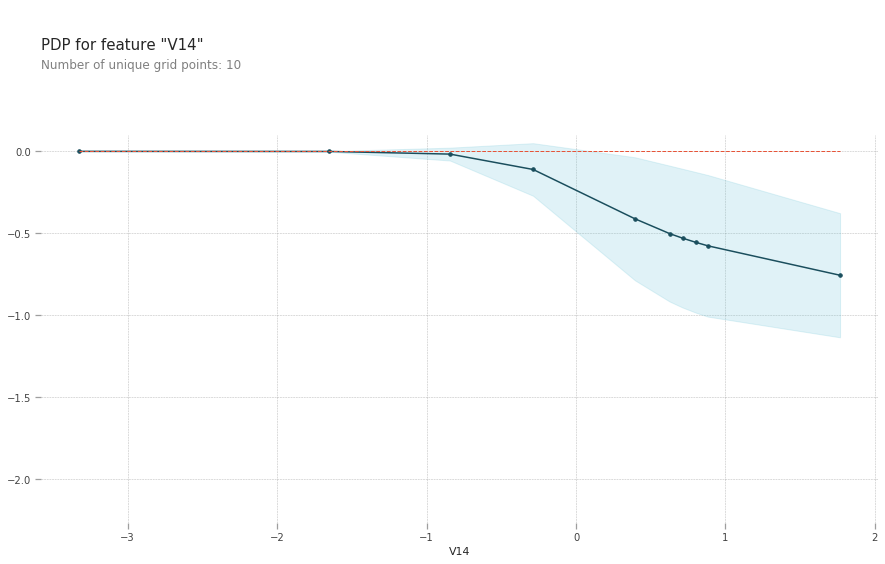

In [57]:
f1 = 'V11'
f2 = 'V14'
show_pdp(estimator, model.X_test, f1)
show_pdp(estimator, model.X_test, f2)

In [58]:
#2D Partial Dependence of two features
def show_2d_pdp(estimator, data, feature1,  feature2):
    features_to_plot = [feature1, feature2]
    inter1  =  pdp.pdp_interact(model=estimator, dataset=data, model_features=data.columns.tolist(), features=features_to_plot)
    pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')
#     pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
    plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


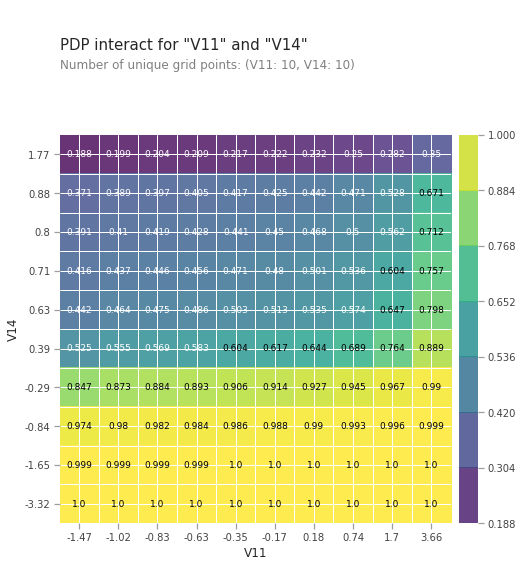

In [59]:
try:
    show_2d_pdp(estimator, model.X_test, f1, f2)
except:
    pass

### 5.3 SHAP
SHAP values interpret the impact of having a certain value for a given feature in the prediction.

#### 5.3.1 SHAP Values

In [60]:
#explain prediction for single row with shap score
def show_shap(estimator, data, row_to_show):
    data_for_prediction = data.iloc[row_to_show]
    explainer = shap.TreeExplainer(estimator)
    shap_values = explainer.shap_values(data_for_prediction)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)    

In [61]:
estimator2 = forest

In [62]:
row_to_predict = 5
show_shap(estimator2, model.X_test, row_to_predict)

#### 5.3.2 SHAP Summary
SHAP summary showed detailed feature importance and how these features influence prediction.

In [63]:
#show shap_values for all of X_test rather than a single row
def show_shap_summary(estimator, data):
    explainer = shap.TreeExplainer(estimator)
    shap_values = explainer.shap_values(data)
    shap.summary_plot(shap_values[1], data)

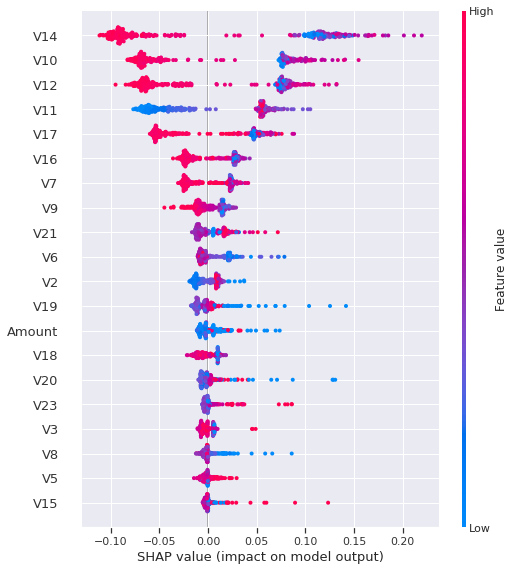

In [64]:
show_shap_summary(estimator2, model.X_test)

#### 5.3.3 SHAP Dependence Contribution
Detailed partial dependence.

In [65]:
#show shap dependence(similar to partial dependence)
def show_shap_dp(estimator, data, feature, target):
    explainer = shap.TreeExplainer(estimator)
    shap_values = explainer.shap_values(data)
    shap.dependence_plot(feature, shap_values[1], data, interaction_index=target)

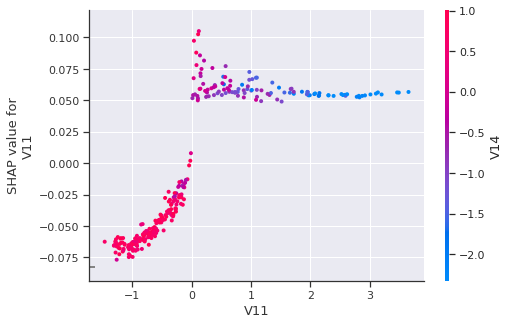

In [66]:
xy = pd.concat((model.X_test,model.y_test),axis=1)
show_shap_dp(estimator2, xy, 'V11', 'V14')

## 6 Other Method
- Regression?
- Cluster?
- Semi-Supervised?

In [67]:
!conda env export > environment.yml

## 7 Discussion
- Encoding & imputing delemma
- Use testset for feature engineering
- Evaluation metrics
- Machine learning fairness. Reference: [Counterfactual Fairness](https://arxiv.org/abs/1703.06856)
- Neural network adversarial attack. Reference: [Adversarial examples in the physical world](https://arxiv.org/abs/1607.02533)